# Topic 1. Descriptive Statistics. Graphical Representation of Data

## Task Summary
The task involves analyzing two datasets: "Airport" and "Babyboom".  
The goal is to perform exploratory data analysis (EDA) on both datasets, interpret the results, and summarize the findings using statistical methods.

### Source code for both datasets

In [111]:
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import numpy as np

In [112]:
with open('../config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

In [129]:
def hist_plot(df: pd.DataFrame) -> None:
    """
    Function to plot histogram of each given column

    :param df: DataFrame
    :return: None
    """
    n_cols = df.shape[1]

    fig, axes = plt.subplots(n_cols, 1, figsize=(10, 5 * n_cols))

    if n_cols == 1:
        axes = [axes]

    for i, column in enumerate(df.columns):
        axes[i].hist(df[column].dropna(), bins=20, edgecolor='black')
        axes[i].set_title(f'Histogram for {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [114]:
def box_plot(df: pd.DataFrame) -> None:
    """
    This func can be used to plot box plots one by one, without need of values normalisation

    :param df: DataFrame
    :return: None
    """

    n_cols = df.shape[1]

    fig, axes = plt.subplots(n_cols, 1, figsize=(10, 5 * n_cols))

    if n_cols == 1:
        axes = [axes]

    for i, column in enumerate(df.columns):
        axes[i].boxplot(df[column].dropna())
        axes[i].set_title(f'Boxplot for {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Value')

    plt.tight_layout()
    plt.show()

In [115]:
def normalize_dataset(df):
    """
    Function to normalize a dataset to the range [min/max, 1] for all numeric variables.

    :param df: DataFrame
    :return: normalized DataFrame
    """

    df_normalized = df.copy()

    for column in df_normalized.select_dtypes(include=['float64', 'int64']).columns:
        max_val = df_normalized[column].max()

        df_normalized[column] = (df_normalized[column]) / (max_val)

    return df_normalized

In [126]:
def descr_stat(df:pd.DataFrame)->None:
    """
    Function to print descriptive stat, needed in task

    :param df: DataFrame
    :return: None
    """
    for column in df.columns:
        data = df[column]
        

        sample_mean = np.mean(data)
        sample_variance = np.var(data, ddof=1)
        standard_deviation = np.std(data, ddof=1)
        median = np.median(data)
        q1, q3 = np.percentile(data, 25), np.percentile(data, 75)
        
        # Printing results for each column
        print(f"Column: {column}")
        print(f"  Sample Mean: {sample_mean}")
        print(f"  Sample Variance: {sample_variance}")
        print(f"  Standard Deviation: {standard_deviation}")
        print(f"  Median: {median}")
        print(f"  1st Quartile: {q1}, 3rd Quartile: {q3}")
        print("-"*30)
    
    # Calculating pairwise correlation coefficients
    print(f"Pairwise Correlation Coefficients:\n{df.corr()}")

---
# Dataset "Airport"

### Variables:
- **Scheduled departures**
- **Performed departures**
- **Enplaned passengers**
- **Enplaned revenue tons of freight**
- **Enplaned revenue tons of mail**

For each of these variables, the following steps will be performed:
1. **Histograms**: Create histograms to visualize the distribution of the variables.
2. **Box plots**: Generate box plots to analyze the spread, central tendency, and any outliers.
3. **Distribution Assumptions**: Make an assumption about the distribution type for each variable.
4. **Box Plot Explanation**: Interpret the values shown in the box plots (median, quartiles, and outliers).
5. **Descriptive Statistics**: Calculate the numerical characteristics:
    - Sample mean
    - Sample variance
    - Standard deviation
    - Median
    - 1st and 3rd quartiles
    - Pairwise correlation coefficients between variables

### 0. Preparing data

In [117]:
airport_column_specifications = [
    (0, 21),  # Airport
    (22, 43),  # City
    (44, 49),  # Scheduled departures
    (51, 56),  # Performed departures
    (58, 65),  # Enplaned passengers
    (67, 75),  # Enplaned revenue tons of freight
    (77, 85)  # Enplaned revenue tons of mail
]

airport_column_names = [
    "Airport",
    "City",
    "Scheduled_departures",
    "Performed_departures",
    "Enplaned_passengers",
    "Enplaned_revenue_tons_of_freight",
    "Enplaned_revenue_tons_of_mail"
]

In [118]:
ds_airport = pd.read_fwf(cfg['datasets']['airport'], colspecs=airport_column_specifications, names=airport_column_names)
ds_airport.head()

,Airport,City,Scheduled_departures,Performed_departures,Enplaned_passengers,Enplaned_revenue_tons_of_freight,Enplaned_revenue_tons_of_mail
0,HARTSFIELD INTL,TLANTA,85693,88803,2665665,65668.76,93039.48
1,BALTO/WASH INTL,ALTIMORE,73300,74048,4420425,18041.52,19722.93
2,LOGAN INTL,OSTON,14153,15524,9549585,27815.09,29785.72
3,DOUGLAS MUNI,HARLOTTE,20210,21798,7076954,36242.84,15399.46
4,OHARE INTL,HICAGO,22430,32338,5636383,463.80,40359.38


Dropping City & Airport 'cause they are not in TS

In [119]:
ds_airport = ds_airport.drop(columns=['Airport', 'City'])

## 1. Histograms

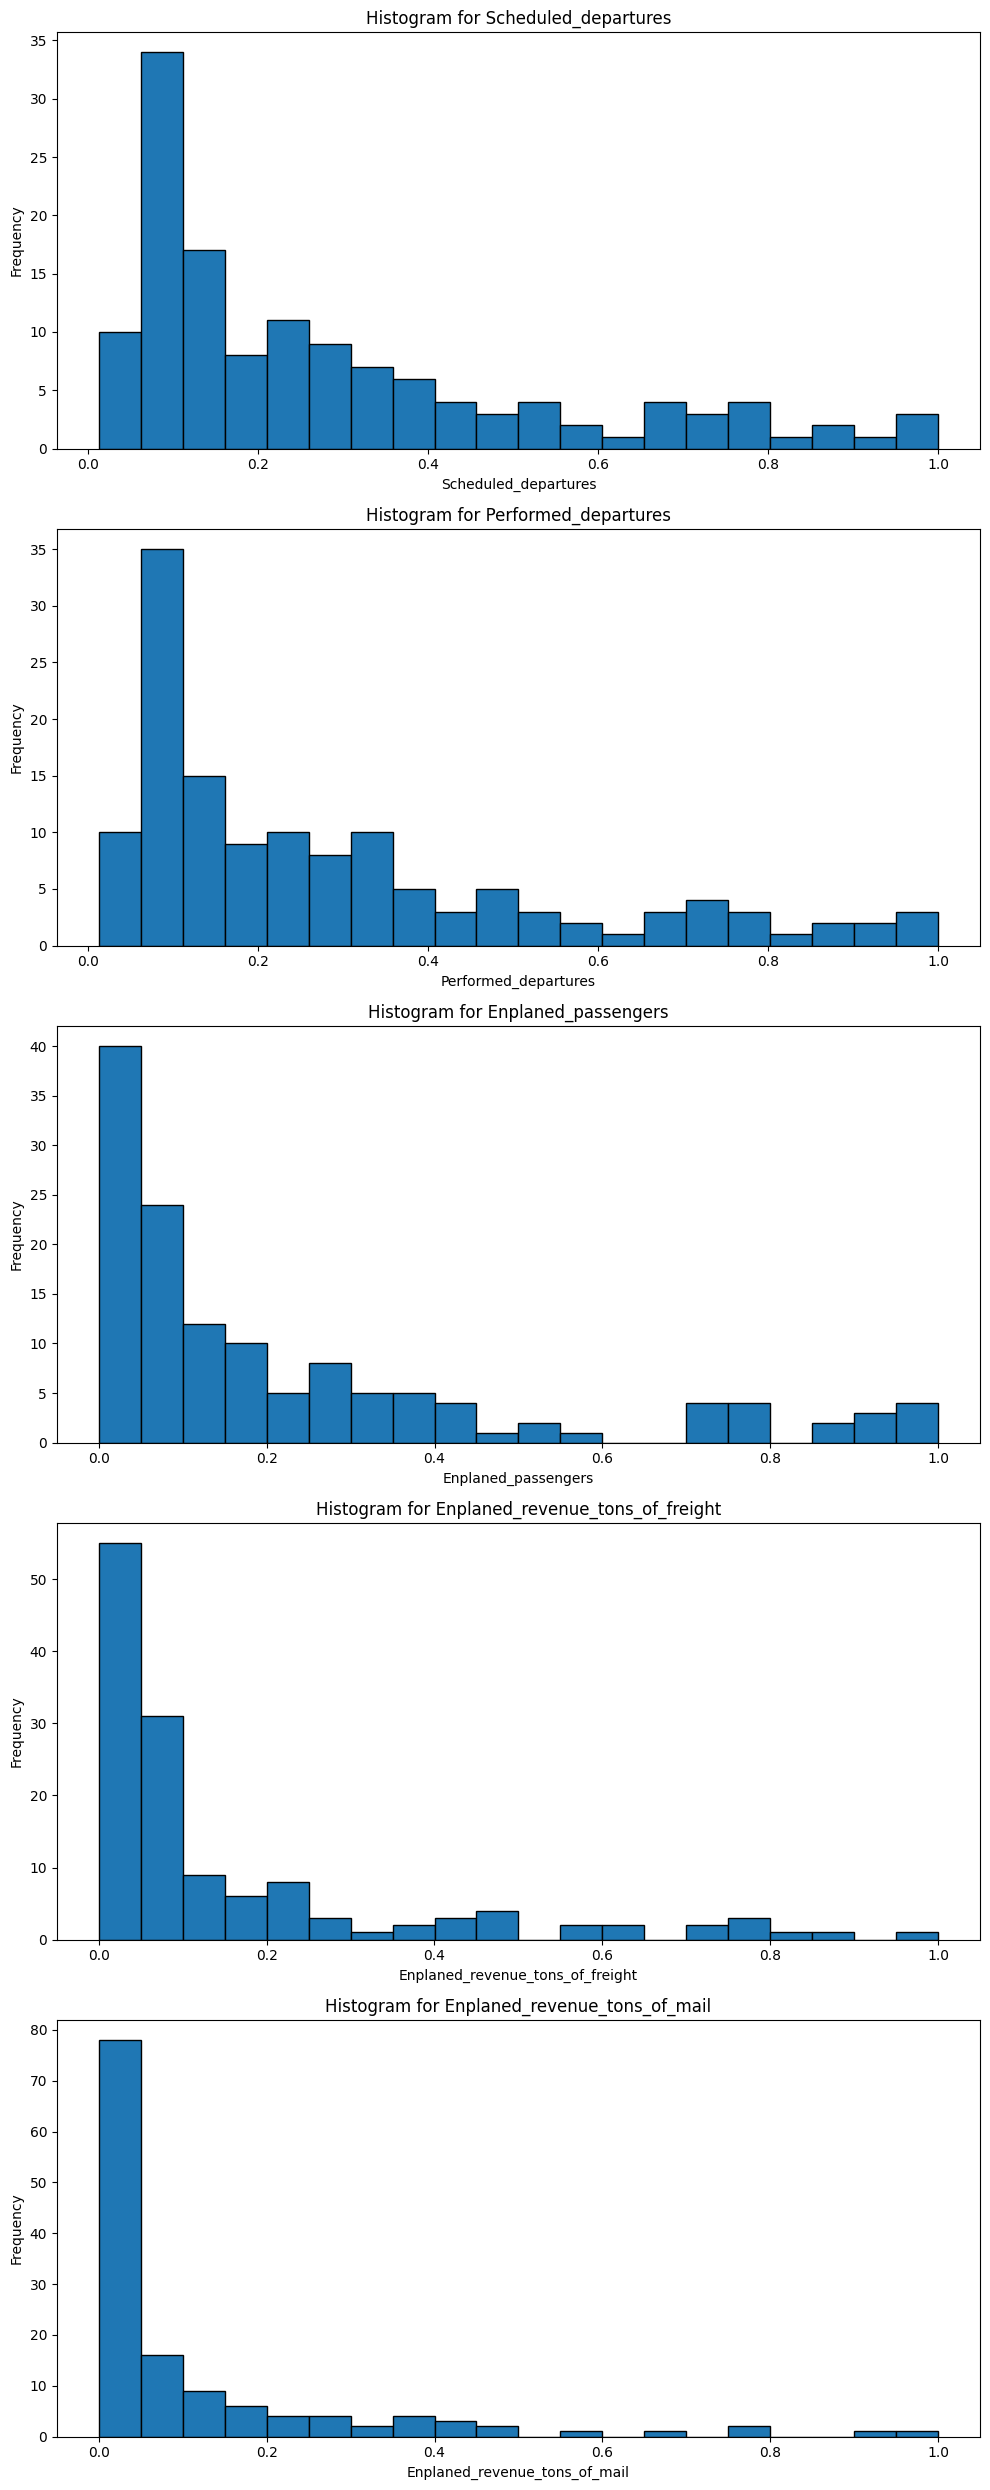

In [120]:
hist_plot(normalize_dataset(ds_airport))

## 2. Boxplots

<Axes: >

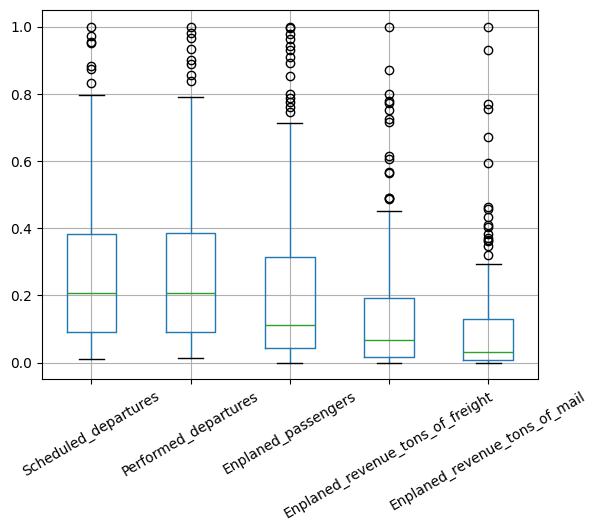

In [121]:
normalize_dataset(ds_airport).boxplot(rot=30)

## 3. Distribution assumptions
Overall, all distributions are characterized by right-side symmetry; however,they may be bimodal as well, but there are not enough data to prove this hypothesis.


## 4. Boxplot explanation
Boxplot proves again that all considered distributions are characterized by left-side symmetry, because median is significantly lower than average.
The degree of 'compression' of the distribution of values increases, and the relative magnitude of outliers from one candle to the next also increases as you move from left to right. Moreover, the distributions become more left-skewed even within the interquartile range.

## 5. Descriptive Statistics

In [127]:
descr_stat(ds_airport)

Column: Scheduled_departures
  Sample Mean: 27651.9776119403
  Sample Variance: 589038491.4806981
  Standard Deviation: 24270.115192983696
  Median: 20156.5
  1st Quartile: 8783.0, 3rd Quartile: 37197.75
------------------------------
Column: Performed_departures
  Sample Mean: 28394.514925373136
  Sample Variance: 617411925.7103019
  Standard Deviation: 24847.775065592934
  Median: 20299.0
  1st Quartile: 8936.5, 3rd Quartile: 38030.5
------------------------------
Column: Enplaned_passengers
  Sample Mean: 2315296.4029850746
  Sample Variance: 7255772804324.904
  Standard Deviation: 2693654.173112225
  Median: 1107733.0
  1st Quartile: 424246.75, 3rd Quartile: 3102631.0
------------------------------
Column: Enplaned_revenue_tons_of_freight
  Sample Mean: 13708.90395522388
  Sample Variance: 360241153.1069354
  Standard Deviation: 18980.019839476863
  Median: 5964.700000000001
  1st Quartile: 1359.0425, 3rd Quartile: 16682.0975
------------------------------
Column: Enplaned_revenue_

And here you can look at normalised stats:

In [128]:
descr_stat(normalize_dataset(ds_airport))

Column: Scheduled_departures
  Sample Mean: 0.28494561804499347
  Sample Variance: 0.06254826211355193
  Standard Deviation: 0.250096505600442
  Median: 0.20770689282070834
  1st Quartile: 0.09050627041620725, 3rd Quartile: 0.38331203693208166
------------------------------
Column: Performed_departures
  Sample Mean: 0.2882311464007099
  Sample Variance: 0.0636191590911625
  Standard Deviation: 0.2522283867671569
  Median: 0.20605402332687056
  1st Quartile: 0.09071391592987728, 3rd Quartile: 0.38604549653345244
------------------------------
Column: Enplaned_passengers
  Sample Mean: 0.23379563434571296
  Sample Variance: 0.07398493149807427
  Standard Deviation: 0.27200171230724685
  Median: 0.11185744472577112
  1st Quartile: 0.042839887760148916, 3rd Quartile: 0.31329966299366724
------------------------------
Column: Enplaned_revenue_tons_of_freight
  Sample Mean: 0.15712707880758037
  Sample Variance: 0.04732492447537328
  Standard Deviation: 0.21754292559256733
  Median: 0.06836

---
# Dataset "Babyboom"

### Variables:
- **Birth weight in grams**
- **Number of minutes after midnight of each birth**

For each of these variables, the following steps will be performed:
1. **Histograms**: Create histograms to visualize the distribution of the variables.
2. **Box plots**: Generate box plots to analyze the spread, central tendency, and any outliers.
3. **Distribution Assumptions**: Make an assumption about the distribution type for each variable.
4. **Box Plot Explanation**: Interpret the values shown in the box plots (median, quartiles, and outliers).
5. **Descriptive Statistics**: Calculate the numerical characteristics:
    - Sample mean
    - Sample variance
    - Standard deviation
    - Median
    - 1st and 3rd quartiles
    - Pairwise correlation coefficients between variables

## 0. Preparing data

In [123]:
babyboom_column_specifications = [
    (0, 8),  # Time of birth
    (8, 16),  # Sex of the child
    (16, 24),  # Birth weight in grams
    (24, 32)  # Minutes after midnight
]

babyboom_column_names = [
    "Time_of_birth",
    "Sex_of_child",
    "Birth_weight_grams",
    "Minutes_after_midnight"
]


In [124]:
ds_babyboom = pd.read_fwf(cfg['datasets']['babyboom'], colspecs=babyboom_column_specifications,
                          names=babyboom_column_names)
ds_babyboom.head()

,Time_of_birth,Sex_of_child,Birth_weight_grams,Minutes_after_midnight
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


Dropping ```Time_of_birth``` and ```Sex_of_child``` 'cause they are not in TS

In [133]:
ds_babyboom = ds_babyboom.drop(columns=['Time_of_birth','Sex_of_child'])

### 1. Histogram

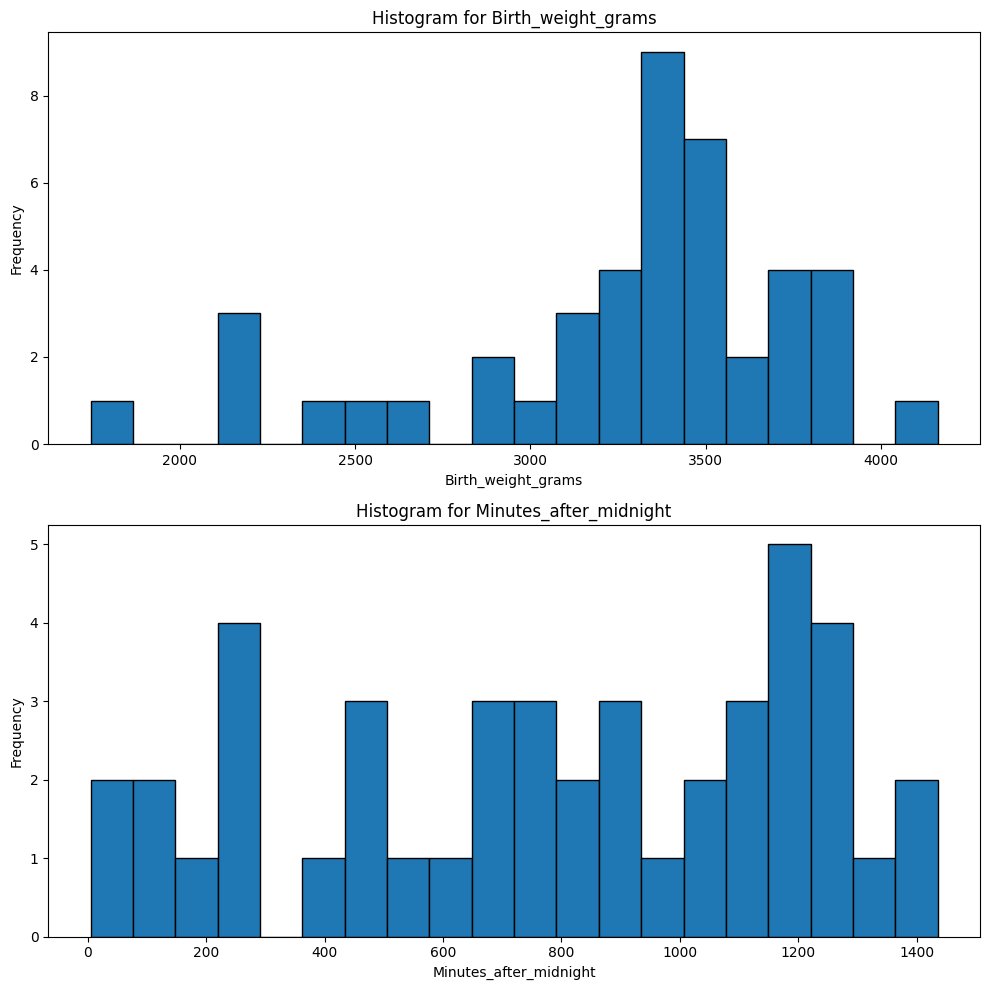

In [134]:
hist_plot(ds_babyboom)

## 2. Box plots

<Axes: >

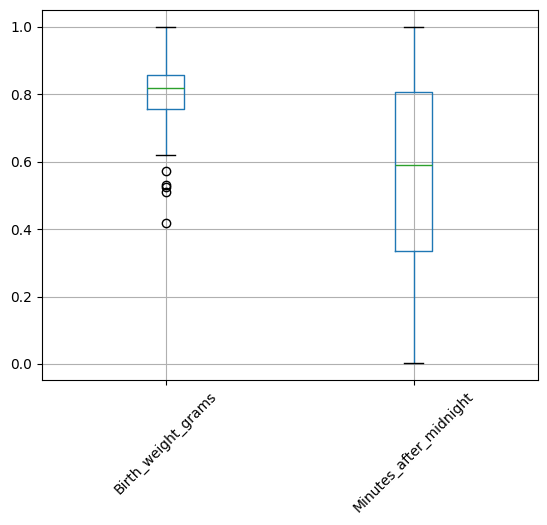

In [135]:
normalize_dataset(ds_babyboom).boxplot(rot=45)

## 3. Distribution assumptions

Variable ```Birth_weight_grams``` seems to have right-side symmetry, although it possibly a bimodal as well.  
Variable ```Minutes_after_midnight``` seems to be symmetrical.

## 4. Box plot analysis

Analysis of boxplot supports our assumptions about distribution.  
<br>
Futhermore, ```Minutes_after_midnight``` seems to be a **discrete uniform distribution**, because of $ mode \approx avg$, symmetry and no outliers.

## 5. Descriptive Statistics


In [136]:
descr_stat(ds_babyboom)

Column: Birth_weight_grams
  Sample Mean: 3275.9545454545455
  Sample Variance: 278818.27695560263
  Standard Deviation: 528.0324582405921
  Median: 3404.0
  1st Quartile: 3141.5, 3rd Quartile: 3571.75
------------------------------
Column: Minutes_after_midnight
  Sample Mean: 788.7272727272727
  Sample Variance: 173111.6913319239
  Standard Deviation: 416.0669313126482
  Median: 846.5
  1st Quartile: 482.75, 3rd Quartile: 1158.5
------------------------------
Pairwise Correlation Coefficients:
                        Birth_weight_grams  Minutes_after_midnight
Birth_weight_grams                1.000000                0.079616
Minutes_after_midnight            0.079616                1.000000
